OBJECTIVE FUNCTION 

In [2]:
# Objective function for a facility location problem
def compute_total_cost(flows, distances, costs):
    n = len(flows)  # Number of facilities
    total_cost = 0
    for i in range(n):
        for j in range(n):
            fij = flows[i][j]  # Flow between facility i and j
            dij = distances[i][j]  # Distance between facility i and j
            cij = costs[i][j]  # Cost coefficient between facility i and j
            total_cost += fij * dij * cij
    return total_cost

# Objective function helpers
def manhattan_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

# Input matrices based on the provided tables
flows = [
    [0, 25, 30, 5, 20, 3, 4, 0, 0],  # From A
    [0, 0, 0, 0, 0, 0, 0, 0, 0],   
    [0, 0, 0, 0, 0, 0, 0, 0, 0],     # Placeholder for other rows
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [15, 0, 0, 0, 0, 0, 0, 0, 0],        # From H
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]

distances = [
    [0, 23.5, 31, 31.5, 38, 15.5, 38, 19.5, 31.5],  # From A
    [23.5, 0, 8.5, 25, 31.5, 39, 61.5, 43, 55],     # From B
    [31, 8.5, 0, 16.5, 23, 30.5, 53, 41.5, 46.5],   # From C
    [31.5, 25, 16.5, 0, 6.5, 23, 36.5, 42, 30],     # From D
    [38, 31.5, 23, 6.5, 0, 29.5, 30, 48.5, 36.5],   # From E
    [15.5, 39, 30.5, 23, 29.5, 0, 22.5, 19, 16],    # From F
    [38, 61.5, 53, 36.5, 30, 22.5, 0, 18.5, 6.5],   # From G
    [19.5, 43, 41.5, 42, 48.5, 19, 18.5, 0, 12],    # From H
    [31.5, 55, 46.5, 30, 36.5, 16, 6.5, 12, 0]      # From I
]

costs = [
    [0, 1612500, 1867500, 315000, 1455000, 85500, 111000, 0, 0],  # From A
    [0, 0, 0, 0, 0, 0, 0, 0, 0],                            
    [0, 0, 0, 0, 0, 0, 0, 0, 0],                                 # Placeholder for other rows
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [438750, 0, 0, 0, 0, 0, 0, 0, 0],                           # From H
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]

# Calculate total cost
total_cost_result = compute_total_cost(flows, distances, costs)
print("Total Cost:", total_cost_result)

Total Cost: 3988713375.0


INITIAL GENERATION

In [2]:
import random

# Departments including facility 'I'
machines = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
population = []

def generate_population():
    for _ in range(30):  # assuming population size is 30
        chromosome = machines.copy()
        random.shuffle(chromosome)
        population.append(chromosome)
    return population

# Call the function to generate the population
generated_population = generate_population()
print("Generated Population:")
for i, chromosome in enumerate(generated_population, start=1):
    print(f"{i}: {chromosome}")

Generated Population:
1: ['F', 'C', 'I', 'A', 'H', 'B', 'G', 'D', 'E']
2: ['B', 'E', 'D', 'I', 'F', 'A', 'C', 'G', 'H']
3: ['I', 'F', 'A', 'E', 'C', 'G', 'H', 'B', 'D']
4: ['D', 'H', 'B', 'I', 'G', 'E', 'A', 'F', 'C']
5: ['D', 'A', 'H', 'I', 'E', 'G', 'B', 'F', 'C']
6: ['E', 'C', 'D', 'G', 'I', 'H', 'A', 'F', 'B']
7: ['C', 'E', 'G', 'H', 'D', 'F', 'B', 'I', 'A']
8: ['F', 'C', 'B', 'H', 'G', 'E', 'I', 'D', 'A']
9: ['I', 'C', 'F', 'D', 'B', 'E', 'A', 'G', 'H']
10: ['I', 'C', 'H', 'F', 'G', 'D', 'E', 'B', 'A']
11: ['C', 'B', 'F', 'A', 'G', 'I', 'H', 'D', 'E']
12: ['C', 'E', 'F', 'I', 'A', 'H', 'B', 'D', 'G']
13: ['D', 'A', 'C', 'G', 'I', 'E', 'F', 'H', 'B']
14: ['D', 'B', 'C', 'G', 'H', 'F', 'E', 'A', 'I']
15: ['H', 'F', 'B', 'E', 'A', 'G', 'I', 'C', 'D']
16: ['E', 'B', 'G', 'A', 'D', 'H', 'C', 'I', 'F']
17: ['D', 'E', 'C', 'B', 'H', 'F', 'A', 'G', 'I']
18: ['H', 'I', 'A', 'G', 'E', 'D', 'C', 'B', 'F']
19: ['H', 'B', 'D', 'E', 'F', 'C', 'I', 'A', 'G']
20: ['D', 'E', 'C', 'H', 'B', 'I', 'A

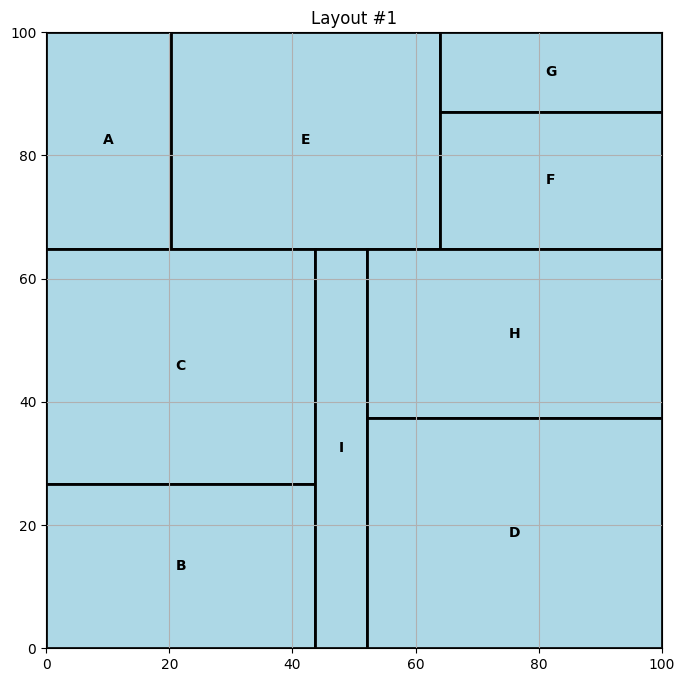

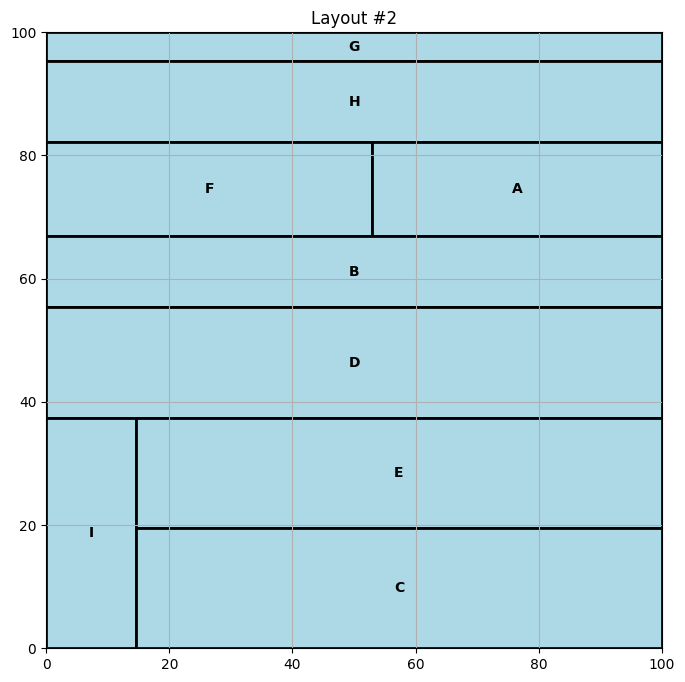

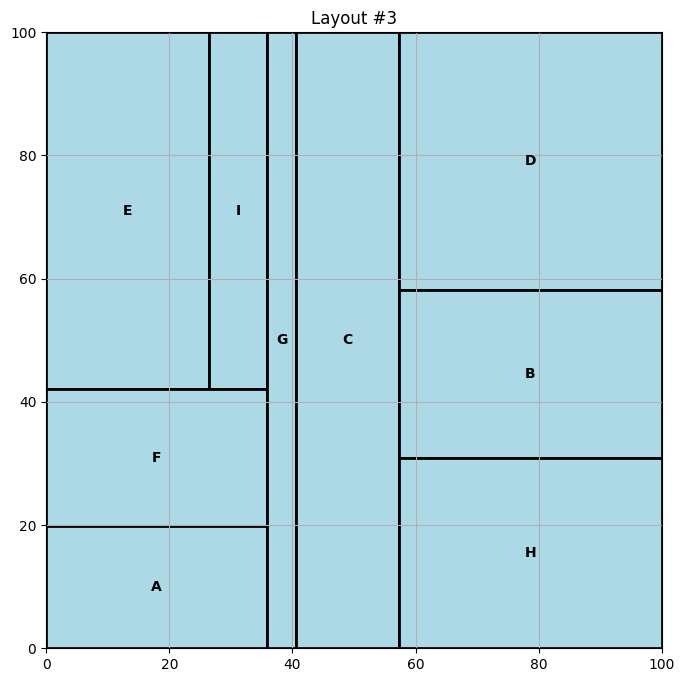

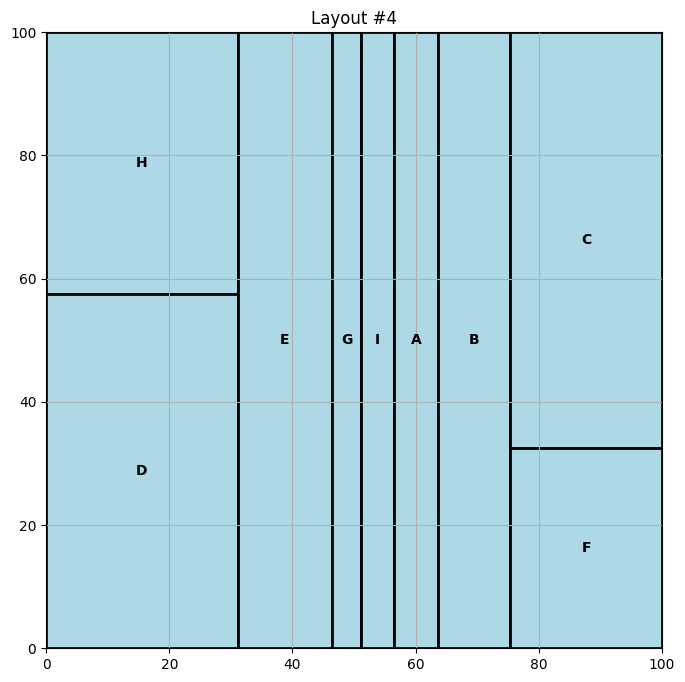

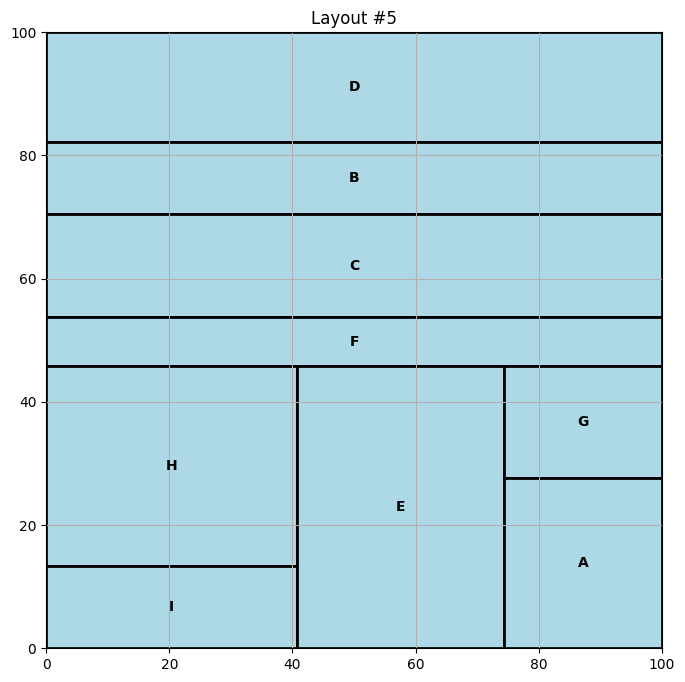

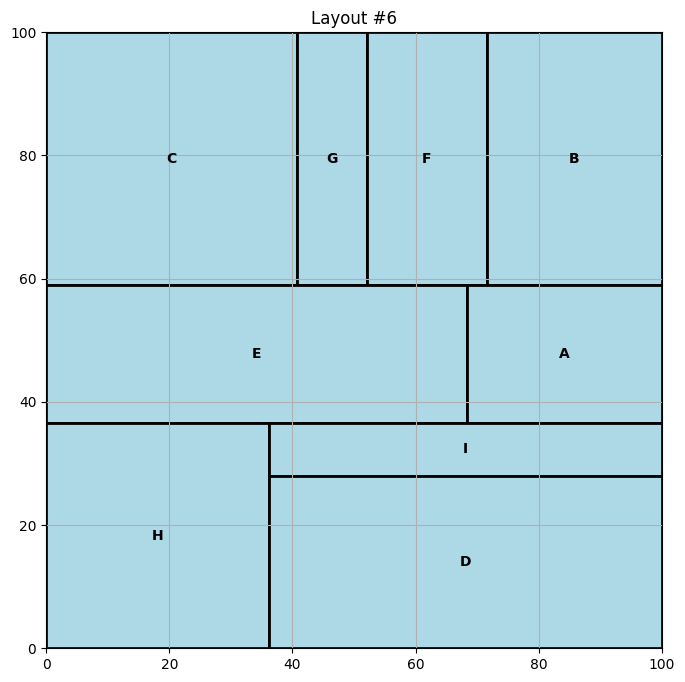

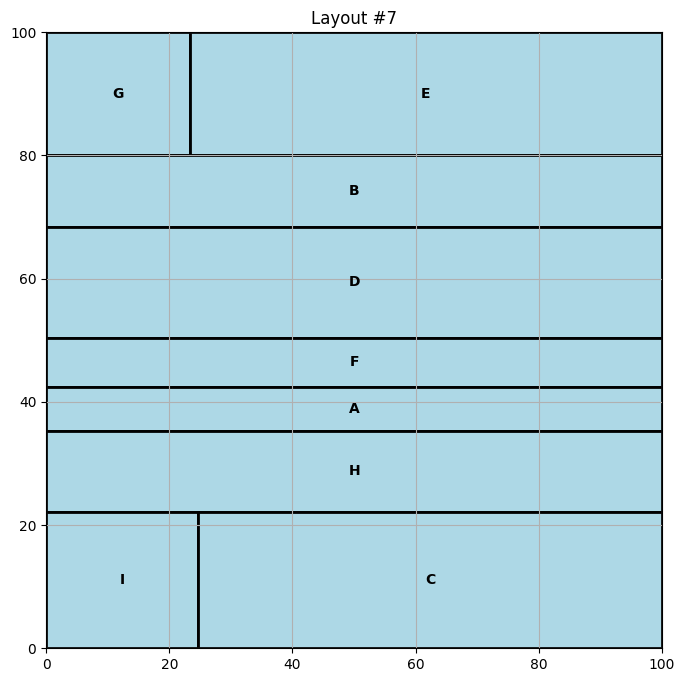

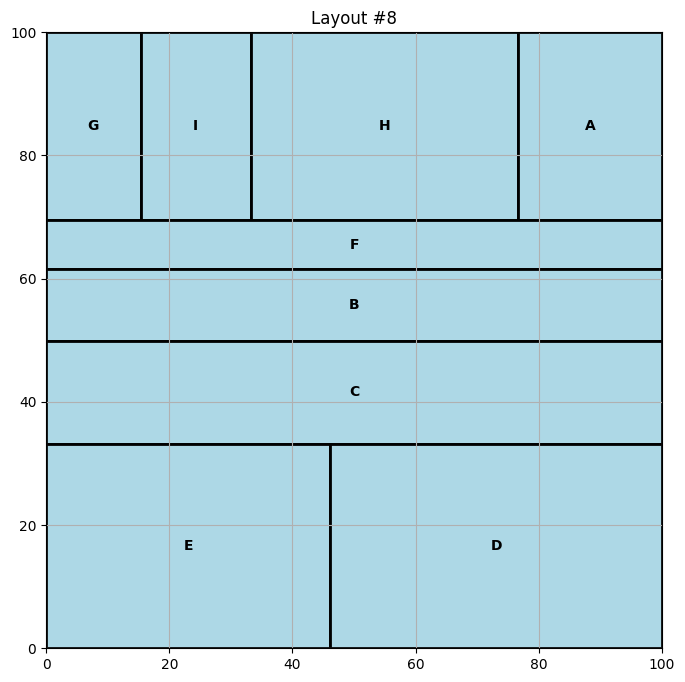

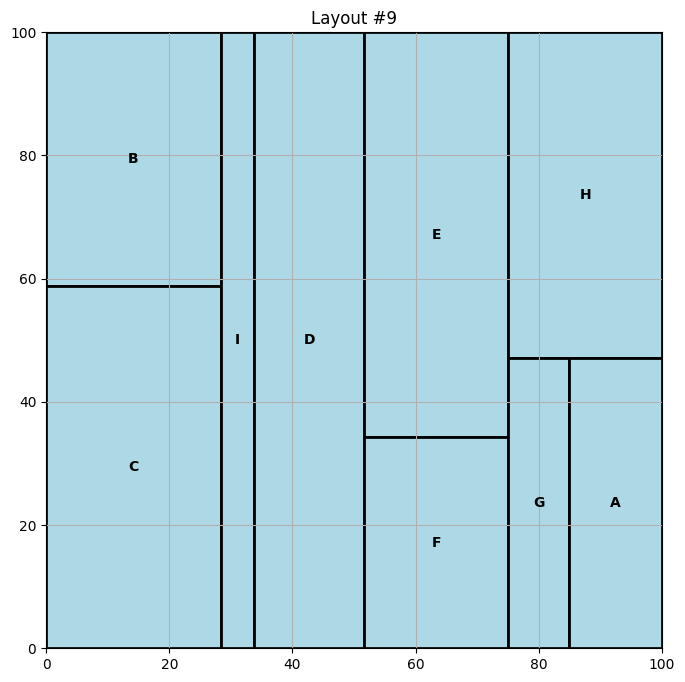

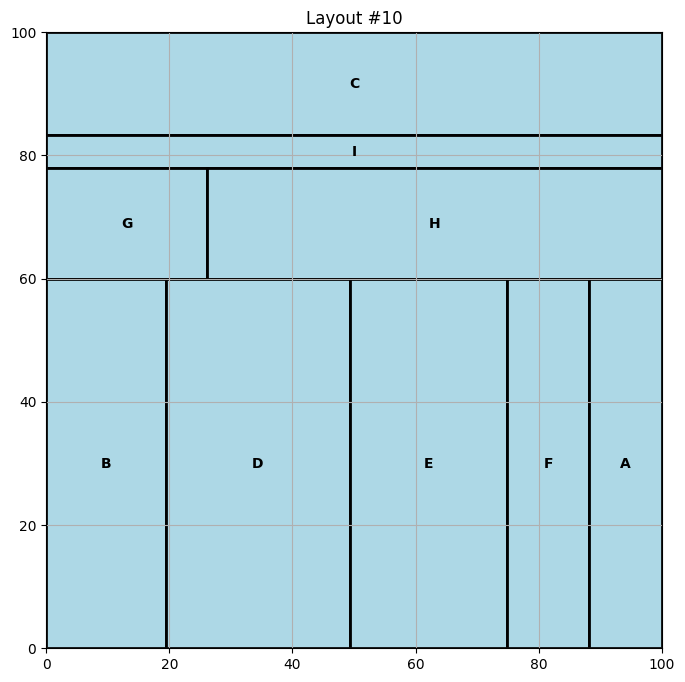

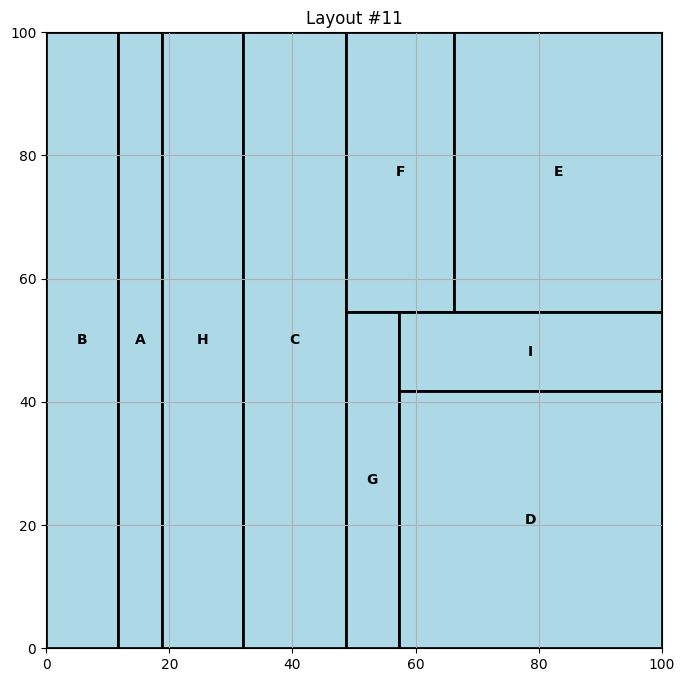

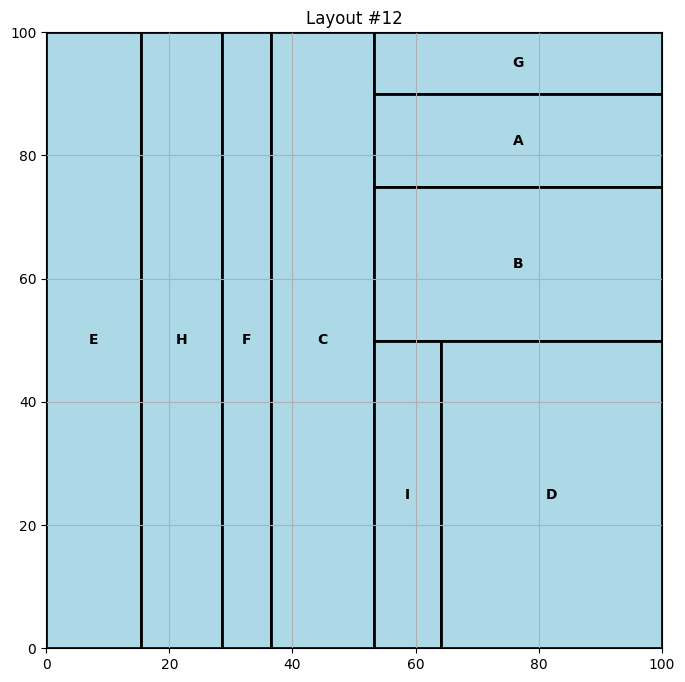

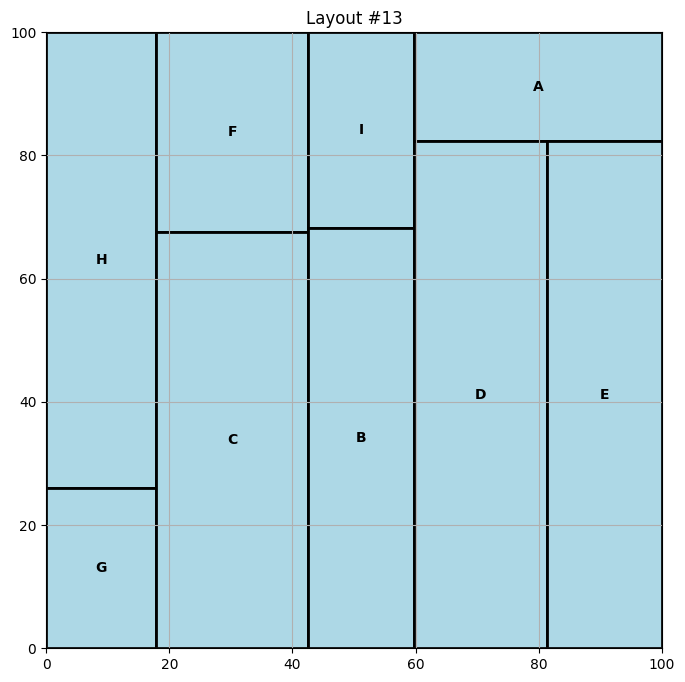

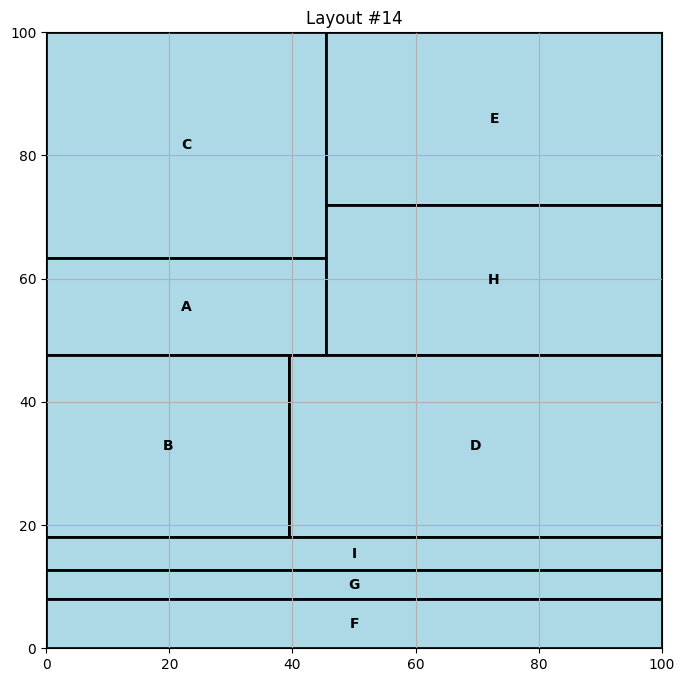

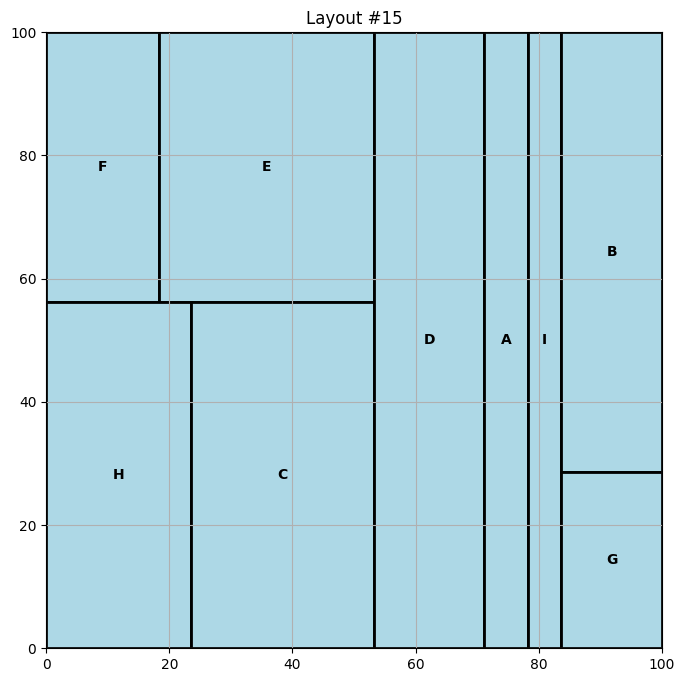

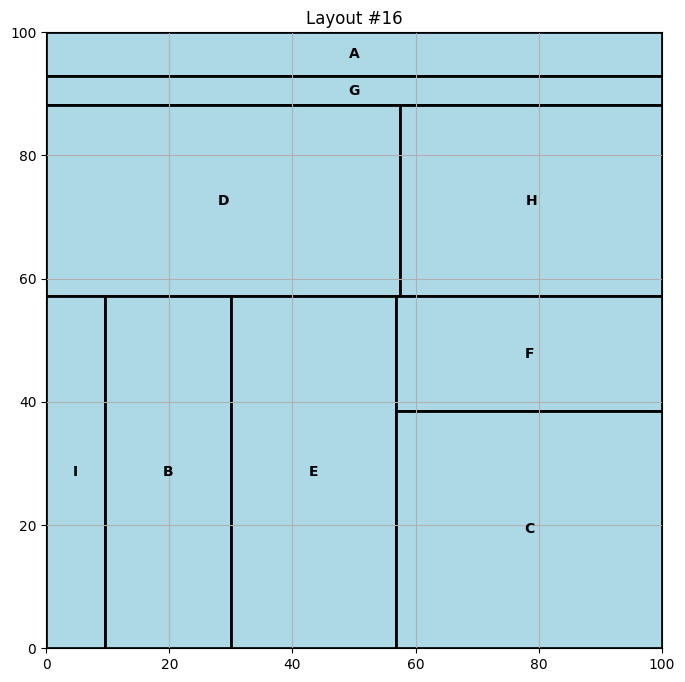

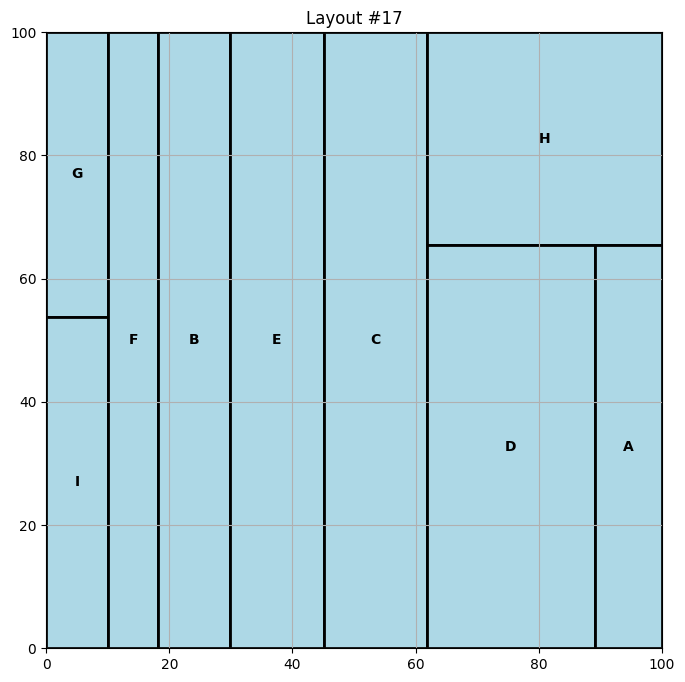

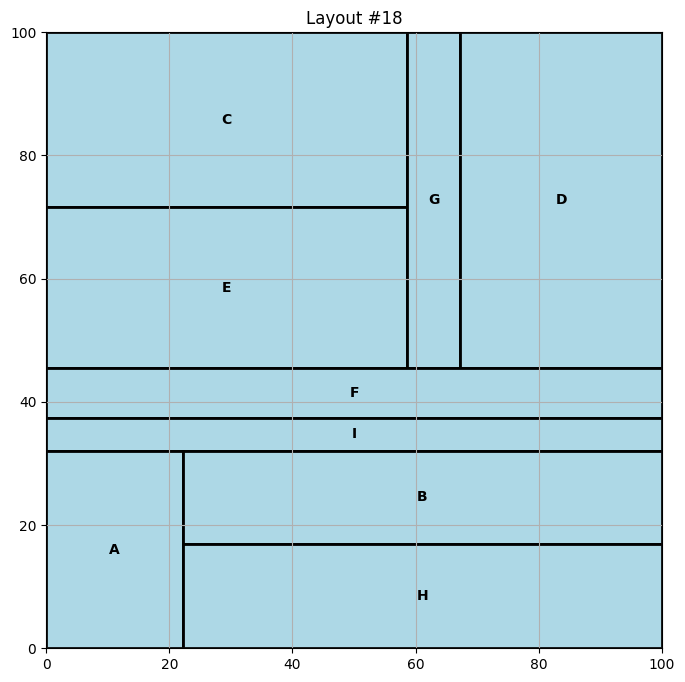

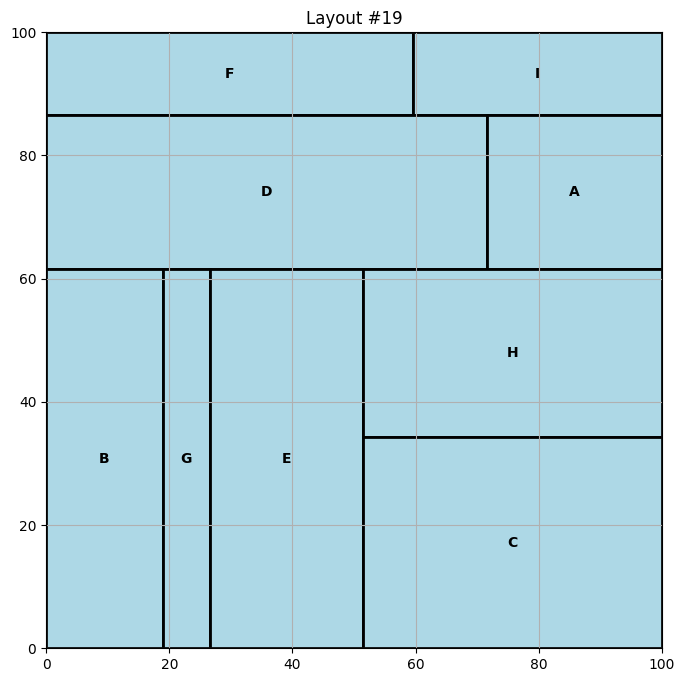

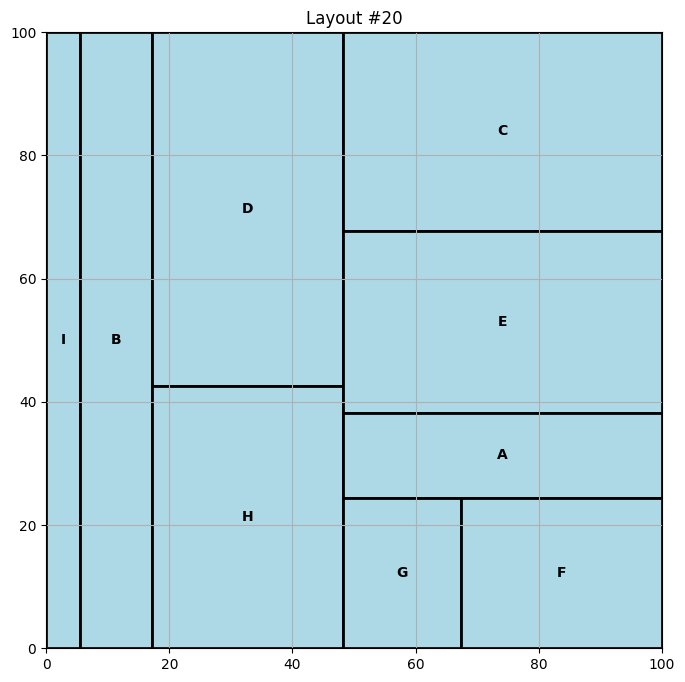

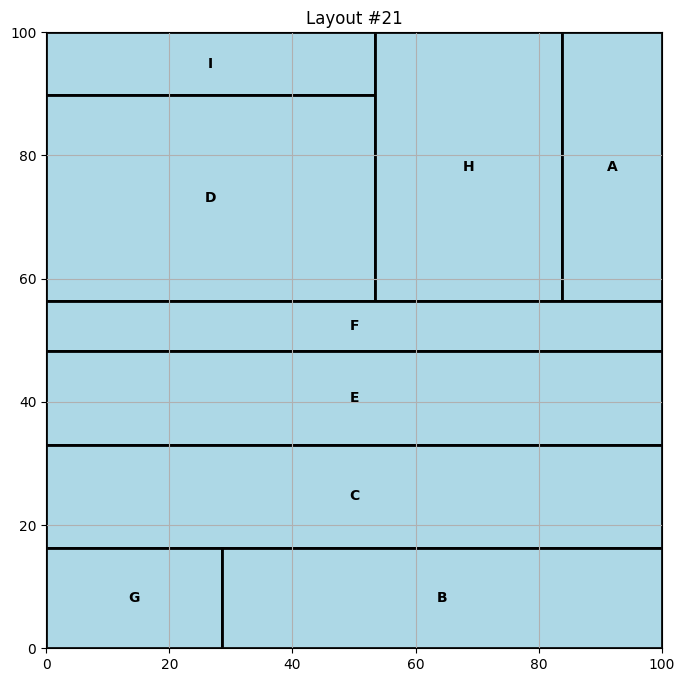

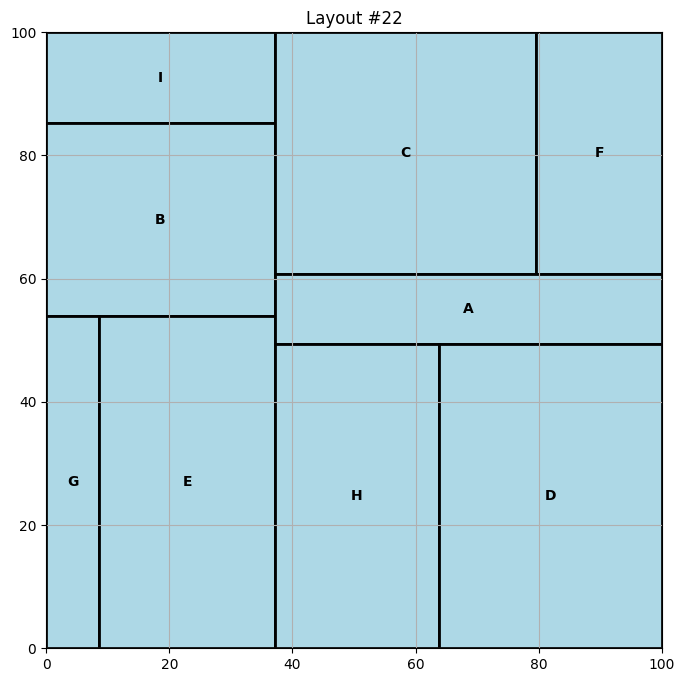

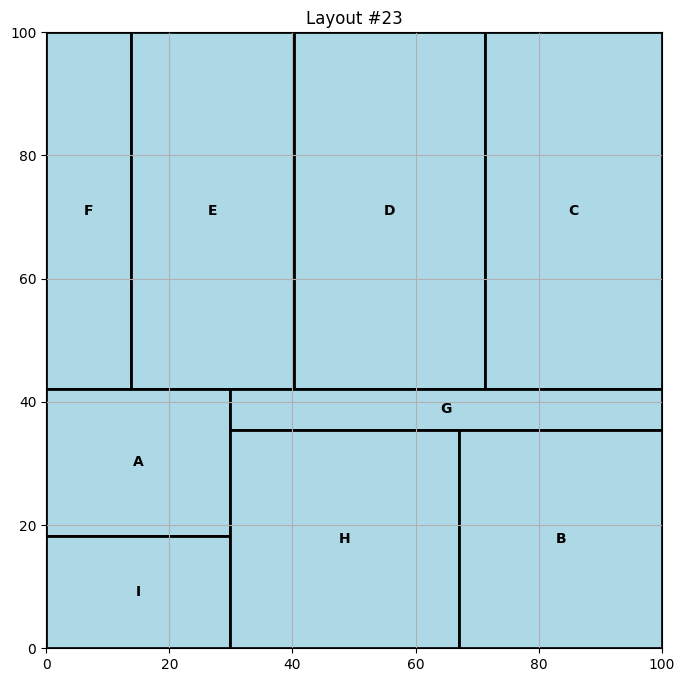

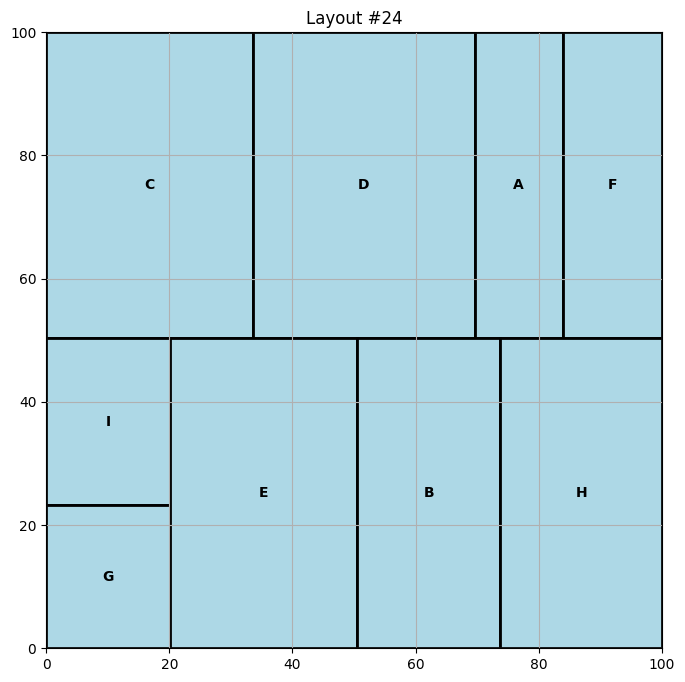

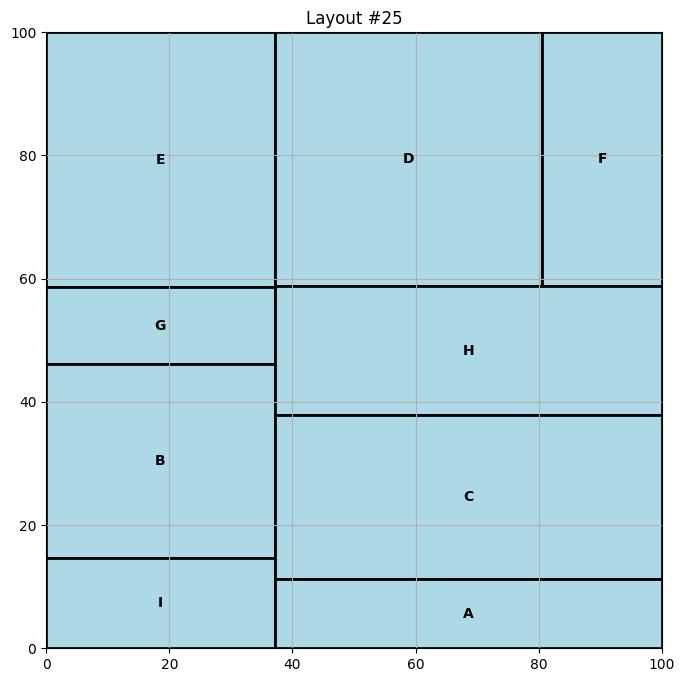

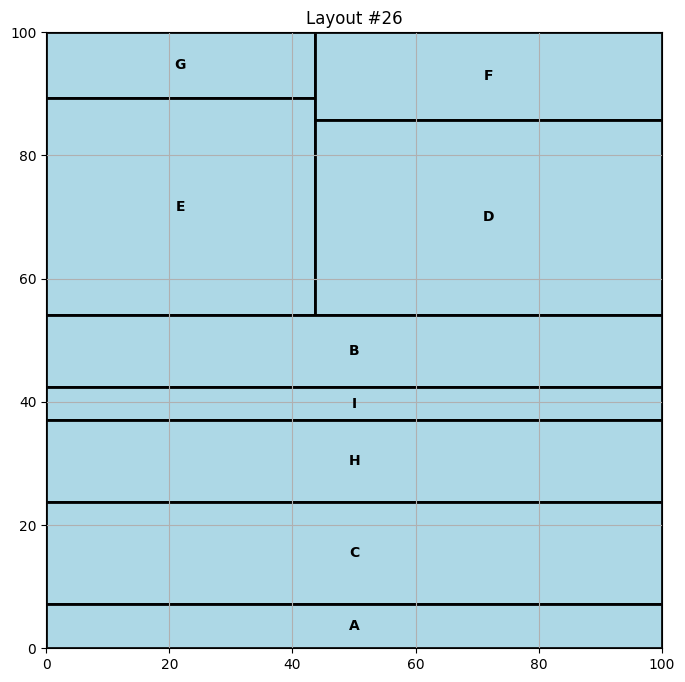

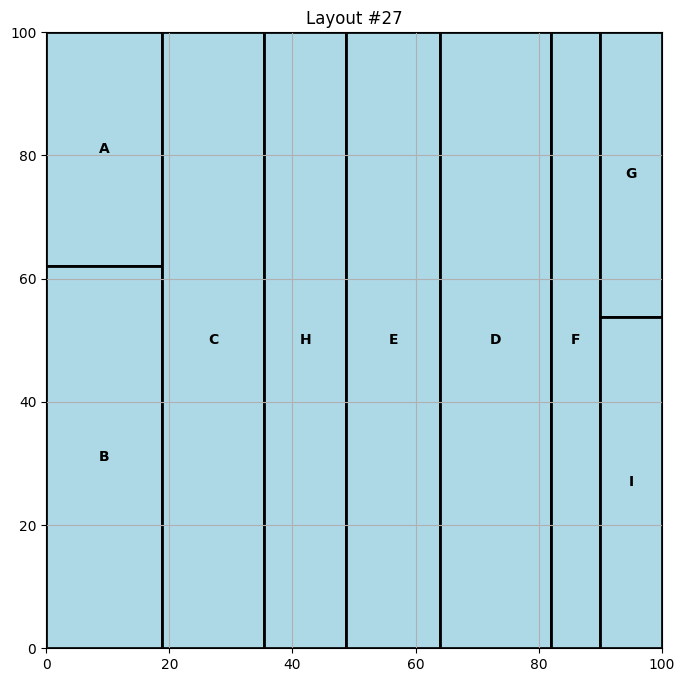

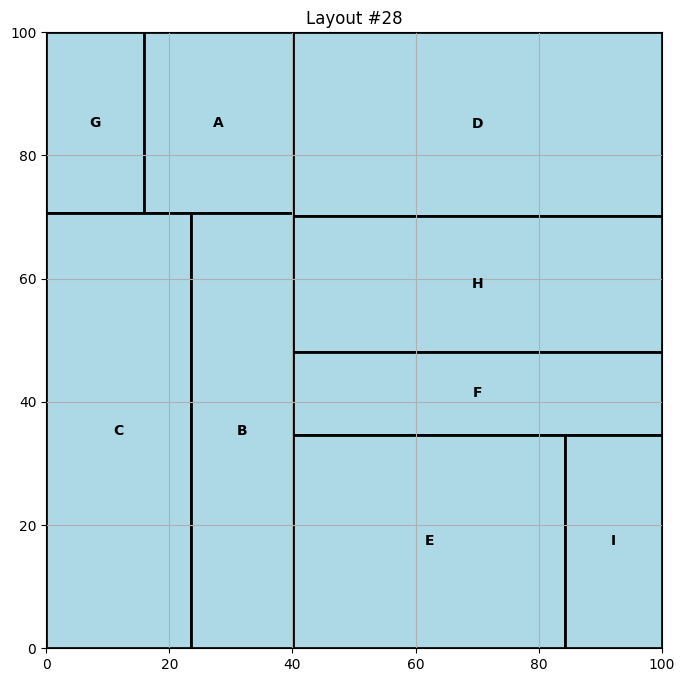

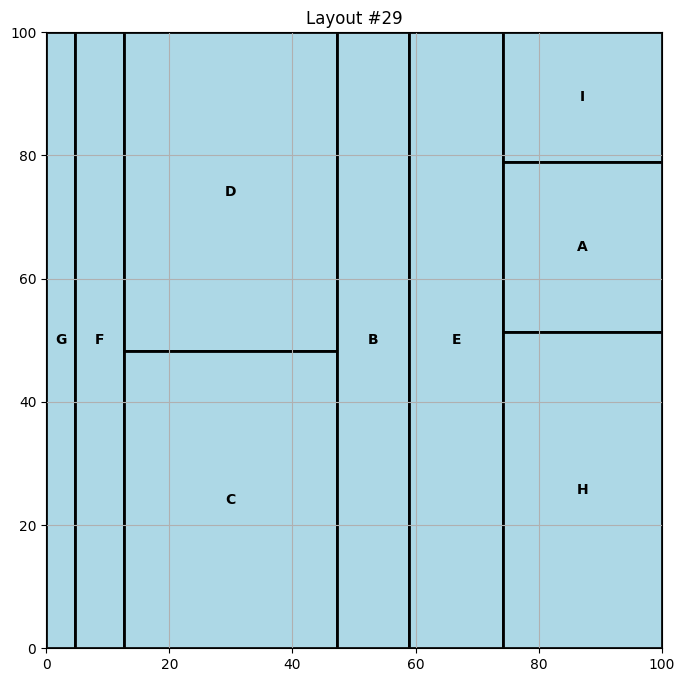

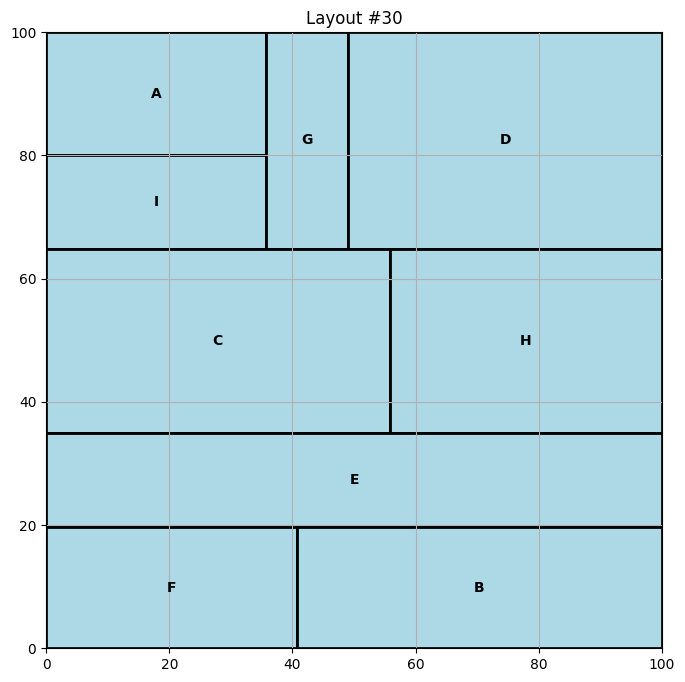

In [3]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# === Parameters ===
layout_width = 100
layout_height = 100
population_size = 30

# === Departments (facilities) with dimensions ===
machines = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
facility_dimensions = {
    'A': (8, 16), 'B': (7, 30), 'C': (10, 30), 'D': (7, 46), 'E': (6, 46),
    'F': (16, 9), 'G': (6, 14), 'H': (17, 14), 'I': (7, 14)
}

# === Generate random slicing tree (symbols: '*' for H, 'v' for V) ===
def generate_slicing_tree(length):
    return [random.choice(['*', 'v']) for _ in range(length - 1)]

# === Generate population of layouts ===
def generate_population():
    population = []
    for _ in range(population_size):
        chromosome = machines.copy()
        random.shuffle(chromosome)
        population.append(chromosome)
    return population

# === Weighted slicing layout algorithm ===
def recursive_slicing_weighted(x, y, width, height, facilities, cuts, cut_index=0):
    if len(facilities) == 1:
        return [(facilities[0], (x, y, width, height))]
    
    cut = cuts[cut_index]
    mid = len(facilities) // 2
    left, right = facilities[:mid], facilities[mid:]

    # Area proportions
    def area(f): return facility_dimensions[f][0] * facility_dimensions[f][1]
    la, ra = sum(area(f) for f in left), sum(area(f) for f in right)
    total = la + ra

    result = []
    if cut == '*':  # Horizontal cut
        h1 = height * (la / total)
        result += recursive_slicing_weighted(x, y + (height - h1), width, h1, left, cuts, cut_index + 1)
        result += recursive_slicing_weighted(x, y, width, height - h1, right, cuts, cut_index + 1 + len(left) - 1)
    else:  # Vertical cut
        w1 = width * (la / total)
        result += recursive_slicing_weighted(x, y, w1, height, left, cuts, cut_index + 1)
        result += recursive_slicing_weighted(x + w1, y, width - w1, height, right, cuts, cut_index + 1 + len(left) - 1)
    
    return result

# === Draw layout using matplotlib ===
def draw_layout(rects, layout_id):
    fig, ax = plt.subplots(figsize=(8, 8))
    for name, (x, y, w, h) in rects:
        ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor='black', facecolor='lightblue', linewidth=2))
        ax.text(x + w / 2, y + h / 2, name, ha='center', va='center', fontsize=10, weight='bold')
    ax.set_xlim(0, layout_width)
    ax.set_ylim(0, layout_height)
    ax.set_title(f"Layout #{layout_id}")
    ax.set_aspect('equal')
    plt.grid(True)
    plt.show()

# === Run the process ===
population = generate_population()
for i, layout in enumerate(population, 1):
    slicing_tree = generate_slicing_tree(len(layout))
    rects = recursive_slicing_weighted(0, 0, layout_width, layout_height, layout, slicing_tree)
    draw_layout(rects, i)


CROSSOVER

In [5]:
import random

# Sample parent pool (20 selected layouts from Step 2)
selected_layouts = [
    ['E', 'C', 'G', 'D', 'A', 'F', 'B', 'H'],
    ['C', 'D', 'G', 'B', 'E', 'F', 'A', 'H'],
    ['E', 'C', 'B', 'H', 'D', 'G', 'F', 'A'],
    ['E', 'H', 'F', 'B', 'A', 'C', 'G', 'D'],
    ['A', 'E', 'F', 'C', 'H', 'B', 'D', 'G'],
    ['E', 'D', 'H', 'C', 'A', 'G', 'F', 'B'],
    ['F', 'A', 'C', 'G', 'B', 'E', 'D', 'H'],
    ['C', 'D', 'E', 'G', 'B', 'F', 'H', 'A'],
    ['G', 'F', 'D', 'A', 'H', 'E', 'B', 'C'],
    ['A', 'H', 'G', 'E', 'D', 'B', 'C', 'F'],
    ['F', 'C', 'D', 'H', 'A', 'B', 'G', 'E'],
    ['F', 'E', 'C', 'A', 'H', 'D', 'G', 'B'],
    ['E', 'A', 'C', 'F', 'G', 'H', 'B', 'D'],
    ['C', 'H', 'F', 'G', 'A', 'B', 'E', 'D'],
    ['E', 'G', 'B', 'C', 'H', 'F', 'D', 'A'],
    ['A', 'C', 'F', 'G', 'B', 'H', 'D', 'E'],
    ['B', 'D', 'E', 'C', 'A', 'H', 'F', 'G'],
    ['G', 'F', 'E', 'A', 'H', 'D', 'B', 'C'],
    ['D', 'H', 'C', 'A', 'F', 'G', 'E', 'B'],
    ['B', 'C', 'A', 'G', 'F', 'H', 'D', 'E']
]

# Function to perform Order Crossover
def order_crossover(parent1, parent2):
    size = len(parent1)
    a, b = sorted(random.sample(range(size), 2))
    
    # Step 1: Copy the slice from Parent1
    child = [None] * size
    child[a:b+1] = parent1[a:b+1]

    # Step 2: Fill the rest from Parent2 in order
    p2_remaining = [gene for gene in parent2 if gene not in child]
    index = 0
    for i in range(size):
        if child[i] is None:
            child[i] = p2_remaining[index]
            index += 1

    return child

# Shuffle and pair parents
random.shuffle(selected_layouts)
offspring_layouts = []

# Generate 10 offspring (5 pairs)
for i in range(0, 10, 1):
    parent1 = selected_layouts[i]
    parent2 = selected_layouts[i+1]
    child = order_crossover(parent1, parent2)
    offspring_layouts.append(child)

# Display offspring
for idx, layout in enumerate(offspring_layouts, 1):
    print(f"Offspring {idx}: {layout}")


Offspring 1: ['G', 'F', 'E', 'A', 'D', 'B', 'C', 'H']
Offspring 2: ['C', 'F', 'E', 'A', 'H', 'D', 'G', 'B']
Offspring 3: ['C', 'D', 'E', 'G', 'B', 'F', 'H', 'A']
Offspring 4: ['C', 'E', 'B', 'H', 'D', 'G', 'F', 'A']
Offspring 5: ['E', 'D', 'G', 'B', 'H', 'C', 'A', 'F']
Offspring 6: ['F', 'D', 'H', 'C', 'A', 'G', 'E', 'B']
Offspring 7: ['E', 'F', 'C', 'A', 'G', 'H', 'B', 'D']
Offspring 8: ['E', 'A', 'C', 'F', 'H', 'D', 'G', 'B']
Offspring 9: ['F', 'E', 'C', 'A', 'H', 'D', 'G', 'B']
Offspring 10: ['F', 'A', 'C', 'E', 'H', 'B', 'G', 'D']


MUTATION

In [6]:
import random

# Assume `offspring_layouts` contains the 10 offspring from the crossover step
# Example:
# offspring_layouts = [
#     ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
#     ...
# ]

def swap_mutation(chromosome, mutation_rate=0.2):
    mutated = chromosome.copy()
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(mutated)), 2)
        mutated[i], mutated[j] = mutated[j], mutated[i]
    return mutated

# Apply mutation to all offspring
mutated_offspring = [swap_mutation(child) for child in offspring_layouts]

# Display mutated results
for idx, layout in enumerate(mutated_offspring, 1):
    print(f"Mutated Offspring {idx}: {layout}")


Mutated Offspring 1: ['G', 'F', 'E', 'A', 'D', 'B', 'C', 'H']
Mutated Offspring 2: ['C', 'F', 'E', 'A', 'H', 'D', 'G', 'B']
Mutated Offspring 3: ['C', 'D', 'E', 'G', 'B', 'F', 'H', 'A']
Mutated Offspring 4: ['C', 'E', 'B', 'H', 'D', 'G', 'F', 'A']
Mutated Offspring 5: ['E', 'D', 'G', 'B', 'H', 'C', 'A', 'F']
Mutated Offspring 6: ['F', 'D', 'H', 'C', 'A', 'G', 'E', 'B']
Mutated Offspring 7: ['E', 'F', 'C', 'A', 'G', 'H', 'B', 'D']
Mutated Offspring 8: ['E', 'A', 'C', 'F', 'D', 'H', 'G', 'B']
Mutated Offspring 9: ['F', 'E', 'C', 'A', 'H', 'D', 'G', 'B']
Mutated Offspring 10: ['F', 'A', 'C', 'E', 'H', 'B', 'G', 'D']
